In [1]:
import sys, os

sys.path.append("/cr/users/filip/bin/")

from utils.binaries import *
from utils.plotting import *

from utils.Auger.SD import UubRandoms
from utils.Auger.SD import Triggers

14:53:36 (   +8.6s) [INFO   ] -- import logging
14:53:36 (  +151ms) [INFO   ] -- import numpy as np
14:53:36 (   +11ms) [INFO   ] -- import uncertainties
14:53:37 (  +694ms) [INFO   ] -- import pandas as pd
14:53:37 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
14:53:37 (    +1ms) [INFO   ] -- import binaries.tools as tools
14:53:38 (  +983ms) [INFO   ] -- import matplotlib.pyplot as plt
14:53:39 (  +747ms) [INFO   ] -- import seaborn as so
14:53:39 (   +23ms) [DEBUG  ] -- font size set to 9.5
14:53:39 (    +3ms) [DEBUG  ] -- label size set to 13.0
14:53:39 (    +0ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
14:53:39 (    +1ms) [DEBUG  ] -- markersize set to 2.0
14:53:39 (    +0ms) [DEBUG  ] -- usetex set to False
14:53:39 (    +2ms) [INFO   ] -- import plotting.tools as plot


In [2]:
date, station = "Mar2023/", "NadiaEarlyFilteredDownsampled/"
root_wcd = "/cr/tempdata01/filip/SSDCalib/UUBCrosscheck/"
root_ssd = f"/cr/tempdata01/filip/UubRandoms/{date}/converted/"

# q_peak = {
#     'NuriaJrFilteredDownsampled/' :      np.array([156.50, 163.65, 162.70]),
#     'PeruFilteredDownsampled/' :         np.array([150.30, 117.50, 153.35]),
#     'NadiaEarlyFilteredDownsampled/' :   np.array([148.90, 162.20, 151.75]),
#     'NadiaLateFilteredDownsampled/' :    np.array([148.90, 162.20, 151.75]),
# }

# def get_latch_bin(wcd_trace):
#     for bin, (b1, b2, b3) in enumerate(zip(*wcd_trace)):

#         if b1 / q_peak[station][0] < 1.75: continue
#         if b2 / q_peak[station][1] < 1.75: continue
#         if b3 / q_peak[station][2] < 1.75: continue

#         return bin * 3
#     else: return -1

14:56:46 (  +74.4s) [DEBUG  ] -- font size set to 9.5
14:56:46 (    +1ms) [DEBUG  ] -- label size set to 13.0
14:56:46 (    +2ms) [DEBUG  ] -- figure size set to [3.3, 2.5]
14:56:46 (    +1ms) [DEBUG  ] -- markersize set to 2.0
14:56:46 (    +1ms) [DEBUG  ] -- usetex set to True


  2/801 [                    ] || 00:00:03>00:25:58,         0.51 it/s


StopIteration: 

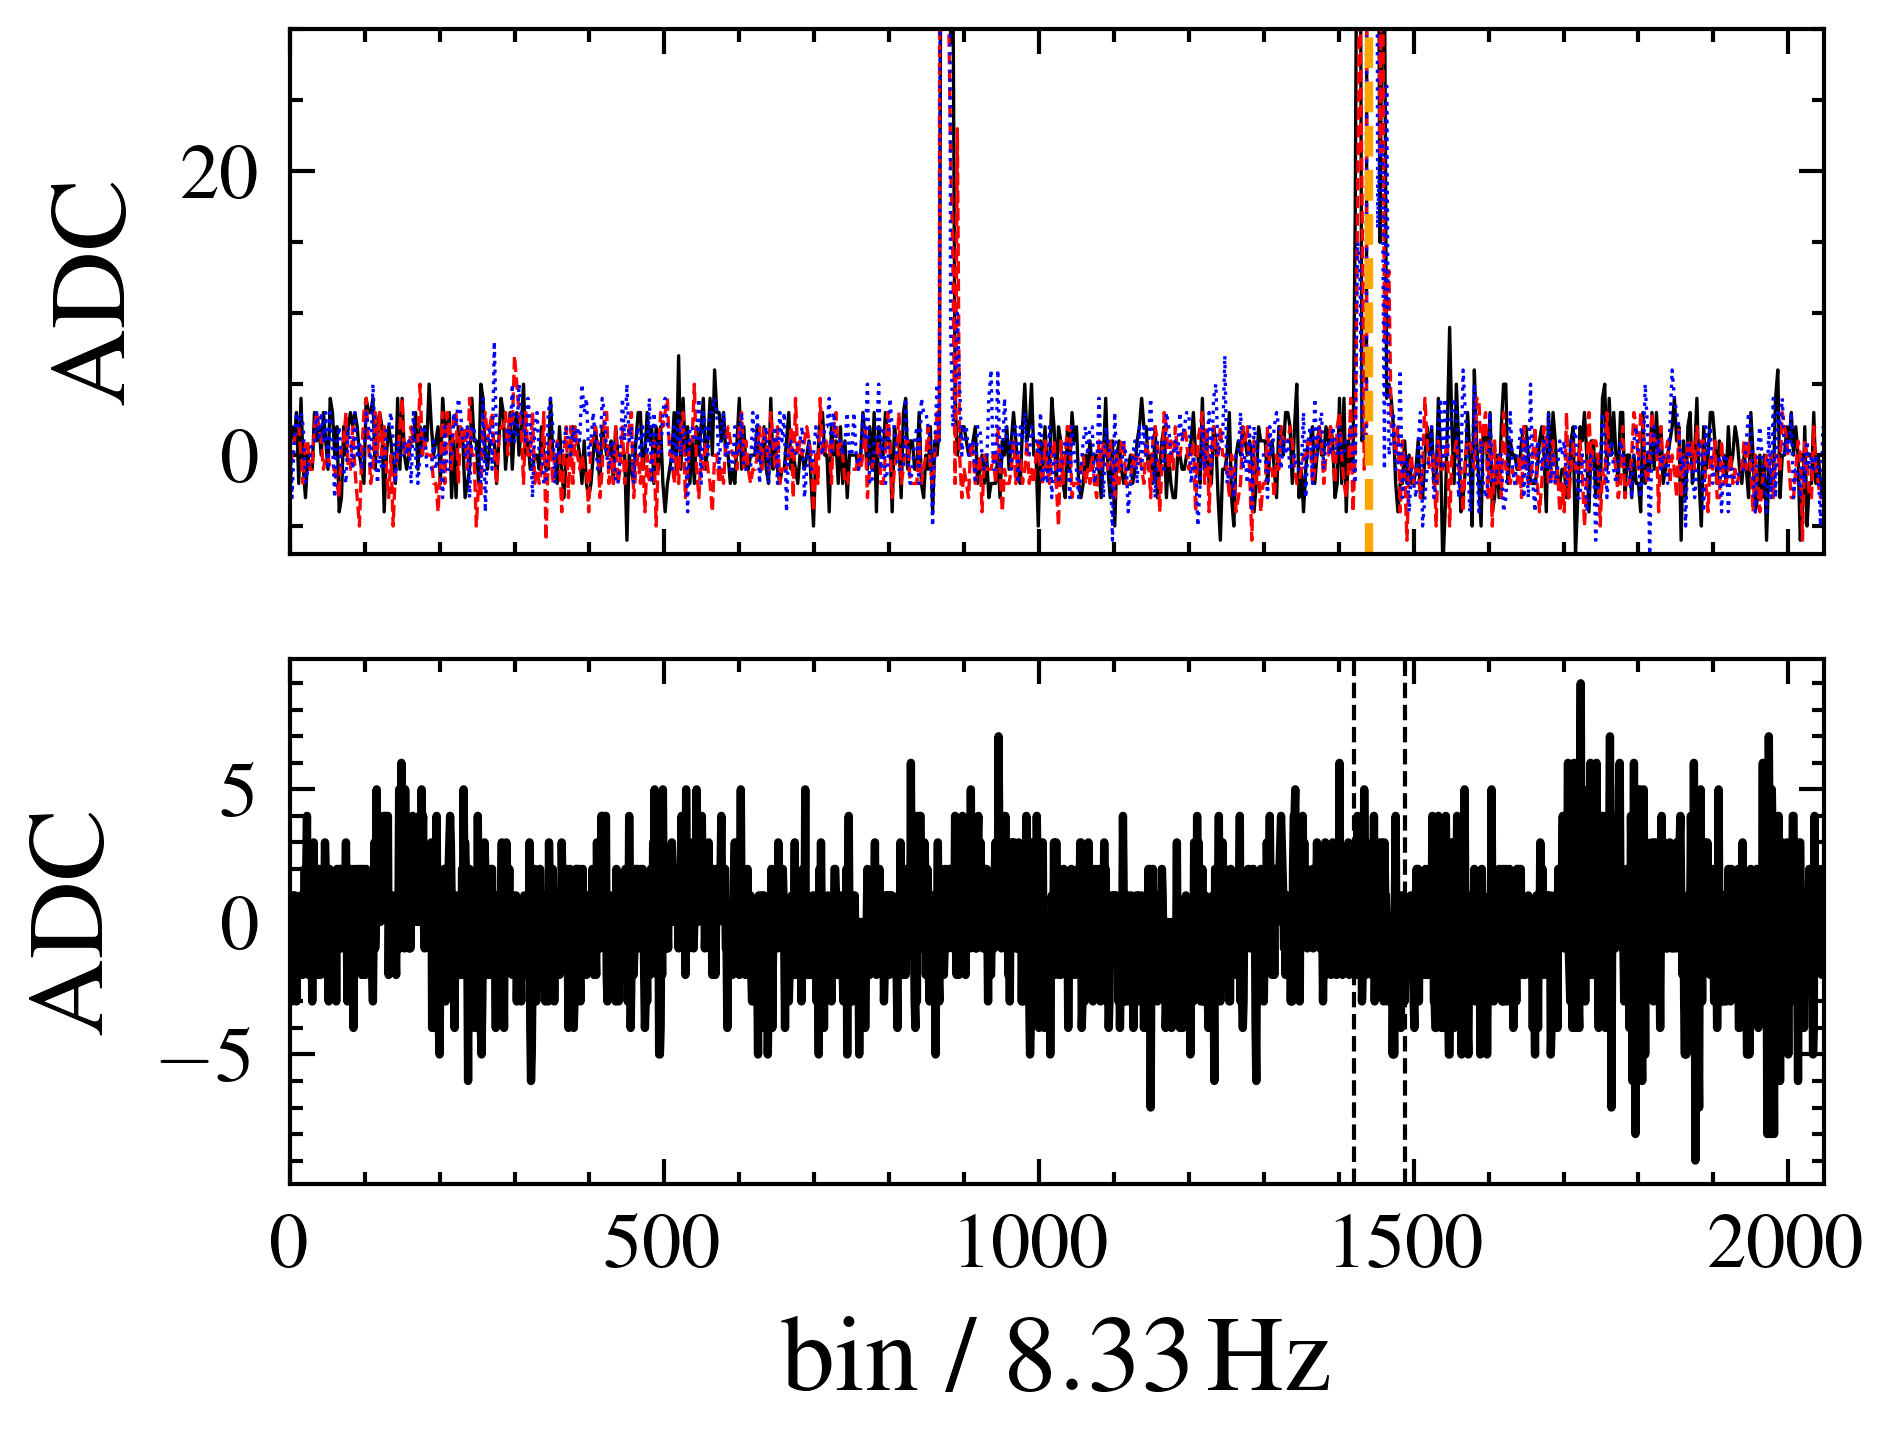

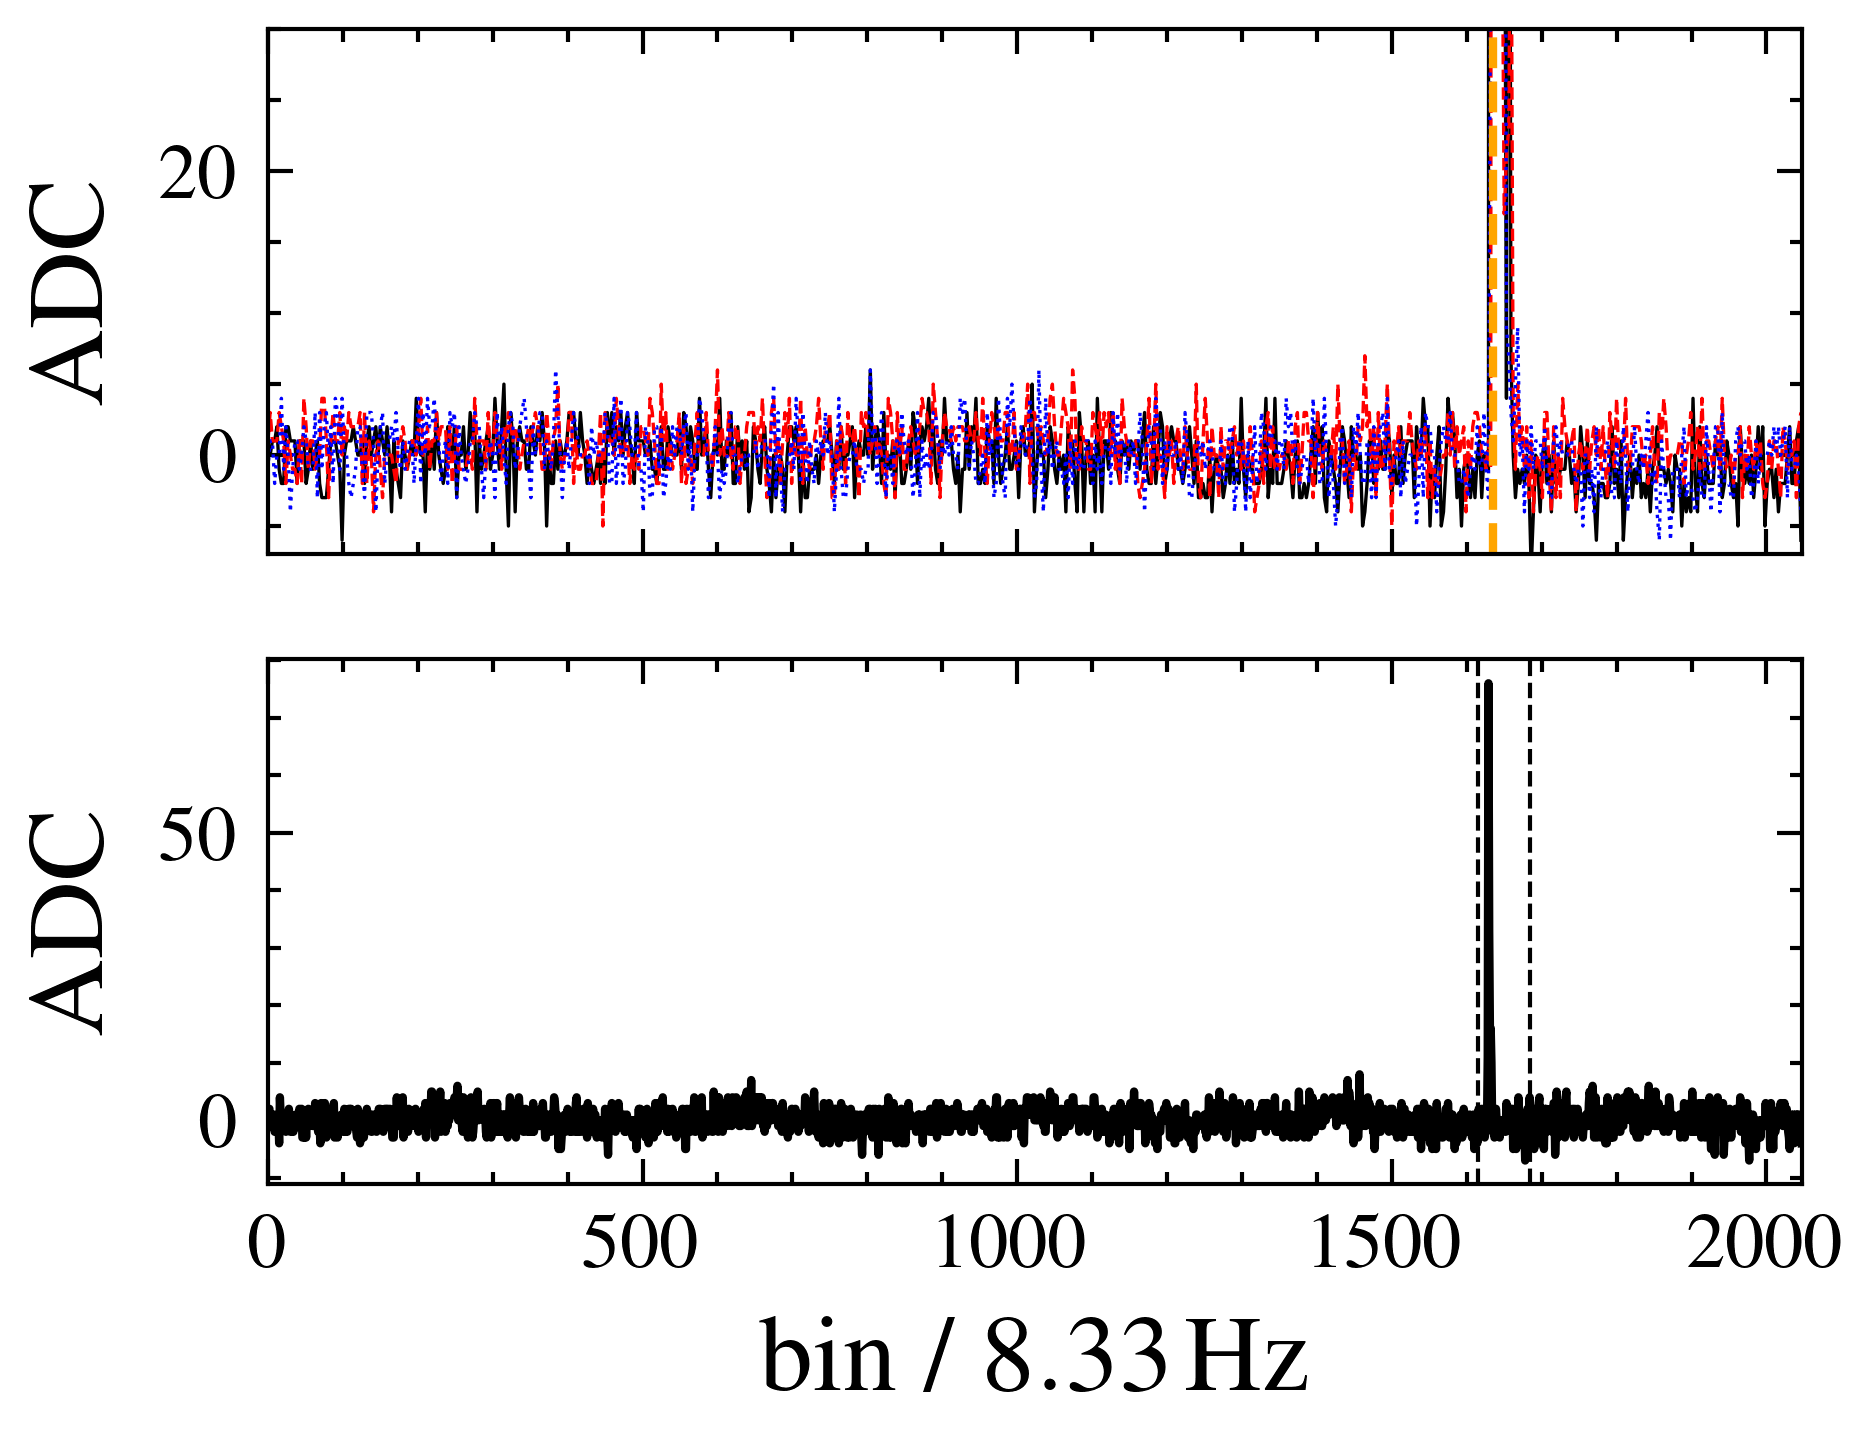

In [7]:
set_plt_style("double tex")

have_noncoinc, have_coinc = False, False
figures = []

for file in tools.ProgressBar(UubRandoms.UubRandom("NuriaJr")):
    for wcd, ssd in zip(*file):

        if (wcd_latch := wcd["t1_latch_bin"]) == -1:
            continue

        wcd_trace, ssd_trace = wcd["traces"], ssd["trace"]

        if wcd_latch - 19 <= ssd_trace.argmax() <= wcd_latch + 40:

            if have_noncoinc:
                continue
            fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
            ax1.plot(range(0, 2048, 3), wcd_trace[0, ::3], lw=0.4)
            ax1.plot(range(0, 2048, 3), wcd_trace[1, ::3], lw=0.4)
            ax1.plot(range(0, 2048, 3), wcd_trace[2, ::3], lw=0.4)
            # ax1.set_xlim(0, 2046)
            ax1.set_ylim(-7, 30)
            ax1.axvline(wcd_latch, c="orange", ls="--")
            ax2.set_xlabel("bin / $\SI{8.33}{\hertz}$")
            ax2.set_ylabel("ADC")
            ax1.set_ylabel("ADC")

            ax2.plot(range(2048), ssd_trace)
            ax2.set_xlim(0, 2048)
            ax2.axvline(np.max([wcd_latch - 20, 0]), c="k", ls="--", lw=0.5)
            ax2.axvline(np.min([wcd_latch + 49, 2047]), c="k", ls="--", lw=0.5)

            plot.save(fig, path="malargue_2024_04/non_coinc")

            have_noncoinc = True

        else:
            if have_coinc:
                continue

            fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
            ax1.plot(range(0, 2048, 3), wcd_trace[0, ::3], lw=0.4)
            ax1.plot(range(0, 2048, 3), wcd_trace[1, ::3], lw=0.4)
            ax1.plot(range(0, 2048, 3), wcd_trace[2, ::3], lw=0.4)
            # ax1.set_xlim(0, 2046)
            ax1.set_ylim(-7, 30)
            ax1.axvline(wcd_latch, c="orange", ls="--")
            ax2.set_xlabel("bin / $\SI{8.33}{\hertz}$")
            ax2.set_ylabel("ADC")
            ax1.set_ylabel("ADC")

            ax2.plot(range(2048), ssd_trace)
            ax2.set_xlim(0, 2048)
            ax2.axvline(np.max([wcd_latch - 20, 0]), c="k", ls="--", lw=0.5)
            ax2.axvline(np.min([wcd_latch + 49, 2047]), c="k", ls="--", lw=0.5)

            plot.save(fig, path="malargue_2024_04/coinc")

            have_coinc = True

        if have_noncoinc and have_coinc:
            raise StopIteration

    # for i_trace, (ssd, wcd) in enumerate(zip(ssd_data, wcd_data)):

    #     signal_in_window = False
    #     if have_misfit and have_fit: raise StopIteration
    #     if (latch_bin := get_latch_bin(wcd)) == -1: continue
    #     if latch_bin in [1611, 873, 150]: continue

    #     print(latch_bin)
    #     ssd_trace = ssd[1:] - ssd[0]
    #     ssd_trace_window = ssd_trace[np.max([latch_bin - 20, 0]) : np.min([latch_bin + 49, 2047])]

    #     if (ssd_max := int(np.max(ssd_trace_window))) < 3 * np.std(ssd_trace):
    #         signal_in_window = True

    #     if signal_in_window and not have_fit:
    #         have_fit = True

    #         fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    #         ax1.plot(range(0, 2046, 3), wcd[0], lw=0.4)
    #         ax1.plot(range(0, 2046, 3), wcd[1], lw=0.4)
    #         ax1.plot(range(0, 2046, 3), wcd[2], lw=0.4)
    #         # ax1.set_xlim(0, 2046)
    #         ax1.set_ylim(-7, 15)
    #         ax1.axvline(latch_bin, c="k", ls="--")
    #         ax2.set_xlabel("bin / $\SI{8.33}{\hertz}$")
    #         ax2.set_ylabel("ADC")
    #         ax1.set_ylabel("ADC")

    #         ax2.plot(range(2048), ssd_trace)
    #         ax2.set_xlim(0, 2048)
    #         ax2.axvline(np.max([latch_bin - 20, 0]), c='gray', ls="--")
    #         ax2.axvline(np.min([latch_bin + 49, 2047]), c='gray', ls="--")

    #     elif not signal_in_window and not have_misfit:
    #         have_misfit = True

    #         fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    #         ax1.plot(range(0, 2046, 3), wcd[0], lw=0.4)
    #         ax1.plot(range(0, 2046, 3), wcd[1], lw=0.4)
    #         ax1.plot(range(0, 2046, 3), wcd[2], lw=0.4)
    #         # ax1.set_xlim(0, 2046)
    #         ax1.set_ylim(-7, 15)
    #         ax1.axvline(latch_bin, c="k", ls="--")

    #         ax2.set_xlabel("bin / $\SI{8.33}{\hertz}$")
    #         ax2.set_ylabel("ADC")
    #         ax1.set_ylabel("ADC")

    #         ax2.plot(range(2048), ssd_trace)
    #         ax2.set_xlim(0, 2048)
    #         ax2.axvline(np.max([latch_bin - 20, 0]), c='gray', ls="--")
    #         ax2.axvline(np.min([latch_bin + 49, 2047]), c='gray', ls="--")

    #     else: continue